In [1]:
from signal import signal
from matplotlib.offsetbox import HPacker
import scipy
import scipy
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity
from spectral_connectivity import multitaper_connectivity
from pathlib import Path
import pandas as pd

In [2]:
THETA = []
THETA_SEM = []
BETA = []
BETA_SEM = []

(324233, 1, 2)
-0.032937246694801886 -0.013015317353498344
(323926, 1, 2)
-0.032241930614632014 0.005922383050210896
(325837, 1, 2)
-0.014463915640329825 0.017880823194169816
(325837, 1, 2)
-0.02022227119754244 -0.017129352612470138
(329080, 1, 2)
-0.011768061115575872 -0.0042110715173339945
(638123, 1, 2)
0.006825212156528066 0.016541083172707336


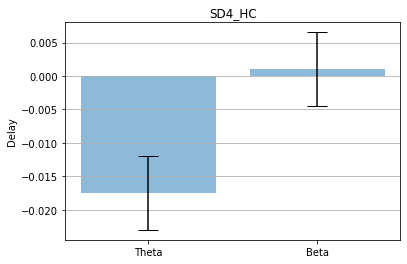

In [3]:
pathsHPC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD1_CON_26-27_07_2018').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD1_CON_26-27_07_2018').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)


sampling_frequency = 1000
time_halfbandwidth_product = 5
n_trials = len(pathsHPC)

theta=[]
beta=[]

for i in range(n_trials):
    dataHPC = scipy.io.loadmat(pathsHPC[i])
    dataPFC = scipy.io.loadmat(pathsPFC[i])
   
    current_dataHPC = dataHPC['HPC']
    current_dataPFC = dataPFC['PFC']
    n_time_samples = len(current_dataHPC)

    time = np.arange(0, n_time_samples)/sampling_frequency
    signal1 = np.zeros(n_time_samples)
    signal2 = np.zeros(n_time_samples)
    signal1 = current_dataHPC
    signal2 = current_dataPFC

    signals = np.stack((signal1, signal2), axis=-1)
    
    print(signals.shape)

    m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
    time_window_duration=10,
    time_window_step=1
    )

    c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

    delay_theta, slope, r_value= c.group_delay(
    frequencies_of_interest=list(range(5,12)), frequency_resolution=m.frequency_resolution
    )

    delay_beta, slope, r_value= c.group_delay(
    frequencies_of_interest=list(range(15,30)), frequency_resolution=m.frequency_resolution
    )
    
    D1=np.nanmean(delay_theta[:,0,1])
    D2=np.nanmean(delay_beta[:,0,1])
    print(D1,D2)
    theta.append(D1)
    beta.append(D2)

# Calculate the average
theta_mean = np.nanmean(theta)
beta_mean = np.nanmean(beta)


# Calculate the standard error of mean
t=pd.Series(theta)
g=pd.Series(beta)
theta_std = (np.nanstd(theta))/(np.sqrt(t.count()))
beta_std = (np.nanstd(beta))/(np.sqrt(g.count()))

# append mean and sem to main list
THETA.append(theta_mean)
BETA.append(beta_mean)
THETA_SEM.append(theta_std)
BETA_SEM.append(beta_std)

# Create lists for the plot
materials = ['Theta', 'Beta']
x_pos = np.arange(len(materials))
CTEs = [theta_mean, beta_mean]
error = [theta_std, beta_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Delay')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('SD4_HC')
ax.yaxis.grid(True)

# Save the figure and show
# plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

(319659, 1, 2)
-0.003618696458123245 -0.00614190708842354
(320035, 1, 2)
0.024641339659773998 0.008100588472552028
(321605, 1, 2)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11292\974920486.py:50: RuntimeWarning: Mean of empty slice
  D2=np.nanmean(delay_beta[:,0,1])


-0.07899534036512244 nan
(318738, 1, 2)
-0.017525094320932372 -0.11926854120201387
(331606, 1, 2)
-0.02453461353355181 0.022171338538684172
(628293, 1, 2)
-0.020290589216047882 nan


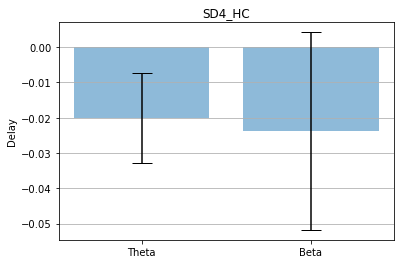

In [4]:
pathsHPC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD2_OD_28-29_07_2018').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD2_OD_28-29_07_2018').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)


sampling_frequency = 1000
time_halfbandwidth_product = 5
n_trials = len(pathsHPC)

theta=[]
beta=[]

for i in range(n_trials):
    dataHPC = scipy.io.loadmat(pathsHPC[i])
    dataPFC = scipy.io.loadmat(pathsPFC[i])
   
    current_dataHPC = dataHPC['HPC']
    current_dataPFC = dataPFC['PFC']
    n_time_samples = len(current_dataHPC)

    time = np.arange(0, n_time_samples)/sampling_frequency
    signal1 = np.zeros(n_time_samples)
    signal2 = np.zeros(n_time_samples)
    signal1 = current_dataHPC
    signal2 = current_dataPFC

    signals = np.stack((signal1, signal2), axis=-1)
    
    print(signals.shape)

    m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
    time_window_duration=10,
    time_window_step=1
    )

    c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

    delay_theta, slope, r_value= c.group_delay(
    frequencies_of_interest=list(range(5,12)), frequency_resolution=m.frequency_resolution
    )

    delay_beta, slope, r_value= c.group_delay(
    frequencies_of_interest=list(range(15,30)), frequency_resolution=m.frequency_resolution
    )
   
    D1=np.nanmean(delay_theta[:,0,1])
    D2=np.nanmean(delay_beta[:,0,1])
    print(D1,D2)
    theta.append(D1)
    beta.append(D2)

# Calculate the average
theta_mean = np.nanmean(theta)
beta_mean = np.nanmean(beta)


# Calculate the standard error of mean
t=pd.Series(theta)
g=pd.Series(beta)
theta_std = (np.nanstd(theta))/(np.sqrt(t.count()))
beta_std = (np.nanstd(beta))/(np.sqrt(g.count()))


# append mean and sem to main list
THETA.append(theta_mean)
BETA.append(beta_mean)
THETA_SEM.append(theta_std)
BETA_SEM.append(beta_std)

# Create lists for the plot
materials = ['Theta', 'Beta']
x_pos = np.arange(len(materials))
CTEs = [theta_mean, beta_mean]
error = [theta_std, beta_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Delay')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('SD4_HC')
ax.yaxis.grid(True)

# Save the figure and show
# plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()


(368777, 1, 2)
-0.03261484617726465 -0.0014578079094299504
(317987, 1, 2)
-0.007776297456668797 -0.0007468392993269494
(327032, 1, 2)
0.0090516167100174 0.026038799642053224
(332869, 1, 2)
0.009086384691193092 0.020996170972590773
(323004, 1, 2)
0.015370156130402183 -0.007141514354956251
(631433, 1, 2)
-0.007001124403498693 -0.02917323826405386


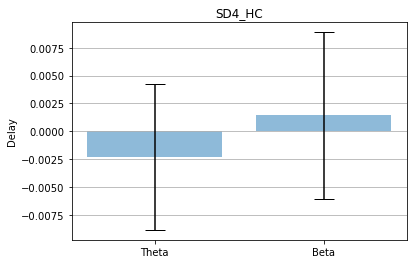

In [5]:
pathsHPC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD3_OR_30-31_07_2018').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD3_OR_30-31_07_2018').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)


sampling_frequency = 1000
time_halfbandwidth_product = 5
n_trials = len(pathsHPC)

theta=[]
beta=[]

for i in range(n_trials):
    dataHPC = scipy.io.loadmat(pathsHPC[i])
    dataPFC = scipy.io.loadmat(pathsPFC[i])
   
    current_dataHPC = dataHPC['HPC']
    current_dataPFC = dataPFC['PFC']
    n_time_samples = len(current_dataHPC)

    time = np.arange(0, n_time_samples)/sampling_frequency
    signal1 = np.zeros(n_time_samples)
    signal2 = np.zeros(n_time_samples)
    signal1 = current_dataHPC
    signal2 = current_dataPFC

    signals = np.stack((signal1, signal2), axis=-1)
    
    print(signals.shape)

    m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
    time_window_duration=10,
    time_window_step=1
    )

    c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

    delay_theta, slope, r_value= c.group_delay(
    frequencies_of_interest=list(range(5,12)), frequency_resolution=m.frequency_resolution
    )

    delay_beta, slope, r_value= c.group_delay(
    frequencies_of_interest=list(range(15,30)), frequency_resolution=m.frequency_resolution
    )
   
    D1=np.nanmean(delay_theta[:,0,1])
    D2=np.nanmean(delay_beta[:,0,1])
    print(D1,D2)
    theta.append(D1)
    beta.append(D2)

# Calculate the average
theta_mean = np.nanmean(theta)
beta_mean = np.nanmean(beta)


# Calculate the standard error of mean
t=pd.Series(theta)
g=pd.Series(beta)
theta_std = (np.nanstd(theta))/(np.sqrt(t.count()))
beta_std = (np.nanstd(beta))/(np.sqrt(g.count()))

# append mean and sem to main list
THETA.append(theta_mean)
BETA.append(beta_mean)
THETA_SEM.append(theta_std)
BETA_SEM.append(beta_std)


# Create lists for the plot
materials = ['Theta', 'Beta']
x_pos = np.arange(len(materials))
CTEs = [theta_mean, beta_mean]
error = [theta_std, beta_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Delay')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('SD4_HC')
ax.yaxis.grid(True)

# Save the figure and show
# plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

(300544, 1, 2)
-0.0012747335714325377 -0.03827025012360972
(301364, 1, 2)
-0.07491894363855259 0.003170564551672163
(300203, 1, 2)
0.0778071829970705 0.007529419922155622
(391373, 1, 2)
-0.06835400916975712 -0.07184895312732176
(302524, 1, 2)
nan -0.00767409565099895


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11292\3483041658.py:49: RuntimeWarning: Mean of empty slice
  D1=np.nanmean(delay_theta[:,0,1])


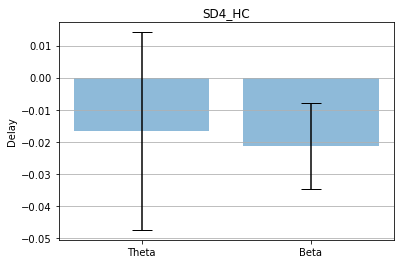

In [6]:
pathsHPC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD4_HC_01_08_2018').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD4_HC_01_08_2018').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)


sampling_frequency = 1000
time_halfbandwidth_product = 5
n_trials = len(pathsHPC)

theta=[]
beta=[]

for i in range(n_trials):
    dataHPC = scipy.io.loadmat(pathsHPC[i])
    dataPFC = scipy.io.loadmat(pathsPFC[i])
   
    current_dataHPC = dataHPC['HPC']
    current_dataPFC = dataPFC['PFC']
    n_time_samples = len(current_dataHPC)

    time = np.arange(0, n_time_samples)/sampling_frequency
    signal1 = np.zeros(n_time_samples)
    signal2 = np.zeros(n_time_samples)
    signal1 = current_dataHPC
    signal2 = current_dataPFC

    signals = np.stack((signal1, signal2), axis=-1)
    
    print(signals.shape)

    m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
    time_window_duration=10,
    time_window_step=1
    )

    c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

    delay_theta, slope, r_value= c.group_delay(
    frequencies_of_interest=list(range(5,12)), frequency_resolution=m.frequency_resolution
    )

    delay_beta, slope, r_value= c.group_delay(
    frequencies_of_interest=list(range(15,30)), frequency_resolution=m.frequency_resolution
    )
   
    D1=np.nanmean(delay_theta[:,0,1])
    D2=np.nanmean(delay_beta[:,0,1])
    print(D1,D2)
    theta.append(D1)
    beta.append(D2)

# Calculate the average
theta_mean = np.nanmean(theta)
beta_mean = np.nanmean(beta)


# Calculate the standard error of mean
t=pd.Series(theta)
g=pd.Series(beta)
theta_std = (np.nanstd(theta))/(np.sqrt(t.count()))
beta_std = (np.nanstd(beta))/(np.sqrt(g.count()))

# append mean and sem to main list
THETA.append(theta_mean)
BETA.append(beta_mean)
THETA_SEM.append(theta_std)
BETA_SEM.append(beta_std)


# Create lists for the plot
materials = ['Theta', 'Beta']
x_pos = np.arange(len(materials))
CTEs = [theta_mean, beta_mean]
error = [theta_std, beta_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Delay')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('SD4_HC')
ax.yaxis.grid(True)

# Save the figure and show
# plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

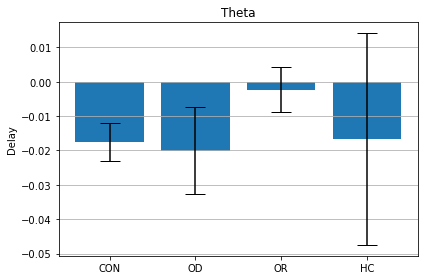

In [7]:
# Create lists for the plot
materials = ['CON', 'OD', 'OR', 'HC']
x_pos = np.arange(len(materials))
CTEs = THETA
error = THETA_SEM


# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,  yerr=error, align='center', ecolor='black', capsize=10)
ax.set_ylabel('Delay')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Theta')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('theta_four_conditions_together.png')
plt.show()

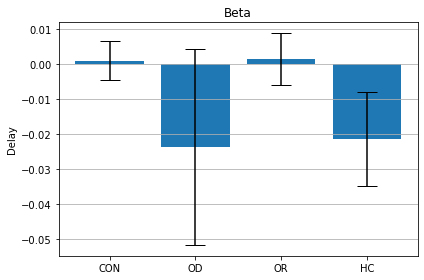

In [8]:
# Create lists for the plot
materials = ['CON', 'OD', 'OR', 'HC']
x_pos = np.arange(len(materials))
CTEs = BETA
error = BETA_SEM


# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,  yerr=error, align='center', ecolor='black', capsize=10)
ax.set_ylabel('Delay')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Beta')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('beta_four_conditions_together.png')
plt.show()

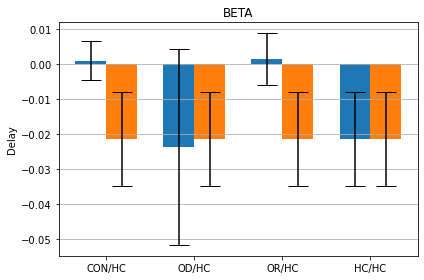

In [9]:
N = len(BETA)
THREE = BETA
THREE_SEM = BETA_SEM

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

# fig = plt.figure()
# ax = fig.add_subplot(111)

fig, ax = plt.subplots()
ax.bar(ind, THREE, width, yerr=THREE_SEM, align='center', ecolor='black', capsize=10)

ONE = [BETA[-1],BETA[-1],BETA[-1],BETA[-1]]
ONE_SEM = [BETA_SEM[-1],BETA_SEM[-1],BETA_SEM[-1],BETA_SEM[-1]]

ax.bar(ind+width, ONE, width, yerr=ONE_SEM, align='center', ecolor='black', capsize=10)

# add some
ax.set_ylabel('Delay')
ax.set_title('BETA')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('CON/HC', 'OD/HC', 'OR/HC', 'HC/HC') )
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('beta_all_conditions_vs_hc.png')
plt.show()
plt.show()

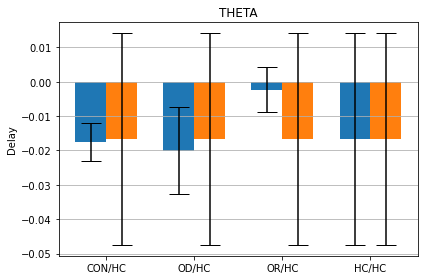

In [10]:
N = len(THETA)
THREE = THETA
THREE_SEM = THETA_SEM

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars


fig, ax = plt.subplots()
ax.bar(ind, THREE, width, yerr=THREE_SEM, align='center', ecolor='black', capsize=10)

ONE = [THETA[-1],THETA[-1],THETA[-1],THETA[-1]]
ONE_SEM = [THETA_SEM[-1],THETA_SEM[-1],THETA_SEM[-1],THETA_SEM[-1]]

ax.bar(ind+width, ONE, width, yerr=ONE_SEM, align='center', ecolor='black', capsize=10)

# add some
ax.set_ylabel('Delay')
ax.set_title('THETA')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('CON/HC', 'OD/HC', 'OR/HC', 'HC/HC') )
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('theta_all_conditions_vs_hc.png')
plt.show()
